In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('faithful.csv')

In [ ]:
df.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


## Problem-1:

### a) Create and print out a scatter plot of this dataset, eruption time versus waiting time.

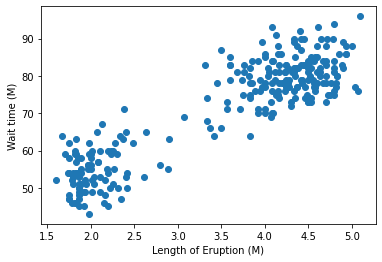

In [ ]:
plt.scatter(df['eruptions'], df['waiting'])
plt.xlabel('Length of Eruption (M)')
plt.ylabel('Wait time (M)');

### b) How many clusters do you see based on your scatter plot?

#### Two clusters of data points

### c) Describe the steps of a hierarchical clustering algorithm. Based on your scatter plot, would this method be appropriate for this dataset?

Most used hierarchical clustering algorithm is agglomerative clustering. The steps of the algorithm are:
1. Assign each data point to a single cluster.
2. Compute proximity matrix using a distance metric such as euclidean distance.
3. Merge the clusters based on similarity between them. Different similarity measures used are ward, min, max, average.
4. Update the proximity matrix after the merge
5. Repeat steps 3 and 4 until all the data points are in a single cluster.
The number of clusters to select can be known from a dendogram with appropriate set threshold.

Yes, we can use hierarchical clustering to identify the clusters in the data.

## Problem-2:

### a) Scratch implementation of k-means

In [ ]:
def objective_function(X, centroids, cluster, k):
  '''
  Calculates the objective function of K-Means clustering algorithm. The objective function is
  sum of square of euclidean distance between the cluster centroid and their respective data points.
  '''
  var = 0
  for i in range(k):
    var += np.sum((X[cluster == i] - centroids[i])**2)
  return var

def get_clusters(X, centroids):
  '''
  Computes the clusters for the data points of the array based on minimum distance of the data point from the centroids.
  '''
  centroids = centroids
  cluster = []
  for ele in X:
    cluster.append(np.argmin(np.sqrt(np.sum((ele - centroids)**2, axis=1))))
  return np.array(cluster)

def compute_centroids(X, k, cluster):
  '''
  Computes the centroids of the cluster by mean of the data points of that cluster.
  '''
  centroids = []
  for i in range(k):
    centroids.append(np.mean(X[cluster == i], axis=0))
  return np.array(centroids)

def k_means(X, k, max_iter, random_state, tol=1e-5):
  '''
  Computes the clusters for input array starting with random initialization and in an iterative approach for specified maximum iterations 
  or difference between previous cluster and new cluster not changing by specified tolerance.
  '''
  np.random.seed(random_state)
  init_centroids_idx = np.random.choice(np.array([i for i in range(X.shape[0])]), k)
  init_centroids = X[init_centroids_idx]
  objf = []
  for i in range(max_iter):
    if i==0:
      previous_centroids = init_centroids
      cluster = get_clusters(X, init_centroids)
      var = objective_function(X, init_centroids, cluster, k)
      objf.append(var)
      new_centroids = compute_centroids(X, k, cluster)
    else:
      previous_centroids = new_centroids
      cluster = get_clusters(X, new_centroids)
      var = objective_function(X, previous_centroids, cluster, k)
      objf.append(var)
      new_centroids = compute_centroids(X, k, cluster)
    if np.sum(np.abs((new_centroids - previous_centroids))) < tol:
      break

  return cluster, new_centroids, objf

### b) A scatter plot of your final clustering, with the data points in each cluster color-coded, or plotted with different symbols. Include the cluster centers in your plot. 

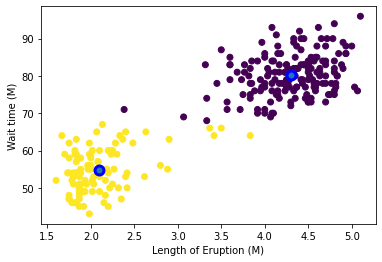

In [ ]:
X = df.to_numpy()
clusters, centroid, objf = k_means(X, 2, 100, random_state=42)
plt.scatter(df['eruptions'], df['waiting'], c=clusters)
plt.scatter(centroid[:,0], centroid[:,1], s=80, marker='o', linewidth=3, edgecolor='b')
plt.xlabel('Length of Eruption (M)')
plt.ylabel('Wait time (M)');

### c) A plot of the k-means objective function versus iterations of the algorithm

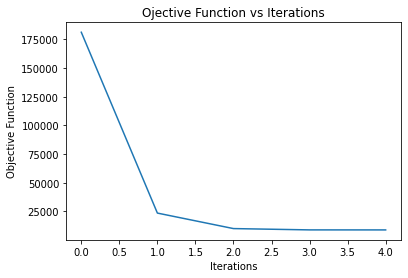

In [ ]:
plt.plot(objf)
plt.xlabel('Iterations')
plt.ylabel('Objective Function')
plt.title('Ojective Function vs Iterations');

### d) Did the method manage to find the clusters that you identified in Problem 1? If not, did it help to run the method again with another random initialization?

Yes, the method is able to identify clusters properly.